In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task : Drug discovery


1.   Explore and prepare data


*   Impoprt data
*   check data and clean it if needed
*   Normalise chimical descriptors if needed


2.   Represent the chimical space via PCA and K-means
* PCA : project molecule on 2D or 3D modele
* K-means clustering : Ordered similar molecule
* Visualisation : Use matplotlib and seaborn for representing the chimical space
3. Color chimical space by Docking Score
* Assign color to molecule in function to their Docking score (link score)
* Observe if certain zone contain more molecules with low scores
4. Analyse the sub cluster with low Docking score
* Identify the sub cluster with low score
* Study the chimical proprieties of these cluster to understand why they interact best
5. Predict the Docking Score with the regression algorithmes
* predict the docking score using the chemical features alone
* Test different regression modeles
 * linear regression
 * Random Forest Regressor
 * Gradient Boosting (XGBoost, LightGBM)
* check the performance of metrics like R sqrt(2)



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# importation des donnees
drug_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage_3/drug_class_struct.txt', sep='\t', header=0)

In [5]:
drug_data.head()

,ID,score,SMILES,target,MW,MW_EXACT,XLogP,HBA,HBD,LIPINSKI_COUNT,...,BondCount,FSP3,RotBondCount,HalogenCount,SpiroCount,PosCount,NegCount,ComponentCount,SimpleRingCount,AromaticRingCount
0,(DESMILES:6968009),-182.9720,C#Cc1ccccc1-c1c(/C(N)=N/O)cc(C(F)(F)F)cc1-c1cc...,ada,396.36,396.108551,5.95,4,3,1,...,31,0.045,4,3,0,0,0,1,3,3
1,(DESMILES:1090761),-172.2308,CCOC(=O)c1cn[nH]c1S(=O)(=O)NC(CN)C1CCCC1,ada,330.40,330.136169,1.68,8,3,0,...,23,0.692,8,0,0,0,0,1,2,1
2,"(DESMILES:11628423,DESMILES:152270,DESMILES:79...",-166.7088,Cn1cnc(Nc2nc(N[C@H](CNC(=O)O)c3ccc(F)cc3)nc(N3...,ada,457.46,457.198608,2.26,12,4,1,...,37,0.350,8,1,0,0,0,1,4,3
3,(DESMILES:1708673),-164.8812,Cc1ccc(Oc2ccc(Nc3ncnc4cc(CNC(=O)O)[nH]c34)cc2C...,ada,404.42,404.159698,2.18,9,4,0,...,33,0.143,6,0,0,0,0,1,4,4
4,"(DESMILES:2774222,DESMILES:6558061)",-164.5410,CC(NC(=O)O)[C@H](CC1CCCCC1)NC(=O)OC(C)(C)C,ada,314.42,314.220551,3.09,6,3,0,...,23,0.875,6,0,0,0,0,1,1,0


In [ ]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94657 entries, 0 to 94656
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 94657 non-null  object 
 1   score              94657 non-null  float64
 2   SMILES             94657 non-null  object 
 3   target             94657 non-null  object 
 4   MW                 94657 non-null  float64
 5   MW_EXACT           94657 non-null  float64
 6   XLogP              94657 non-null  float64
 7   HBA                94657 non-null  int64  
 8   HBD                94657 non-null  int64  
 9   LIPINSKI_COUNT     94657 non-null  int64  
 10  RO3_COUNT          94657 non-null  int64  
 11  TPSA_NO            94657 non-null  float64
 12  TPSA_NOPS          94657 non-null  float64
 13  HAC                94657 non-null  int64  
 14  AtomCount          94657 non-null  int64  
 15  BondCount          94657 non-null  int64  
 16  FSP3               946

In [ ]:
# check if there no null data
print(drug_data.isnull().sum())

ID                   0
score                0
SMILES               0
target               0
MW                   0
MW_EXACT             0
XLogP                0
HBA                  0
HBD                  0
LIPINSKI_COUNT       0
RO3_COUNT            0
TPSA_NO              0
TPSA_NOPS            0
HAC                  0
AtomCount            0
BondCount            0
FSP3                 0
RotBondCount         0
HalogenCount         0
SpiroCount           0
PosCount             0
NegCount             0
ComponentCount       0
SimpleRingCount      0
AromaticRingCount    0
dtype: int64


In [ ]:
# check double
print(f"Nombre de doublons : {drug_data.duplicated().sum()}")

Nombre de doublons : 0


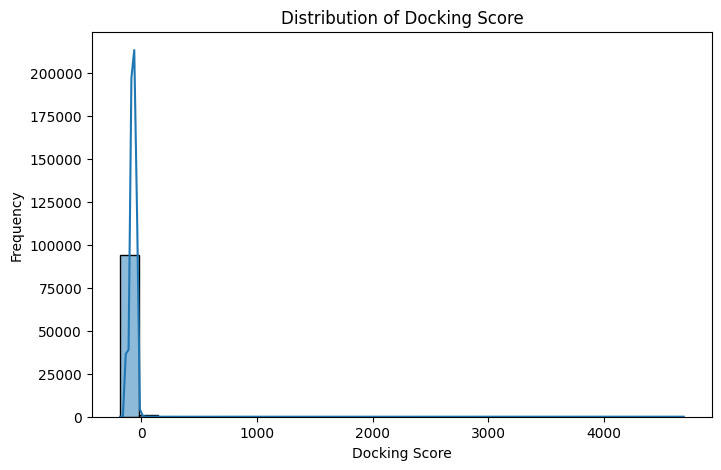

In [6]:
# Plot the docking score
plt.figure(figsize=(8,5))
sns.histplot(drug_data["score"], bins=30, kde=True)
plt.xlabel("Docking Score")
plt.ylabel("Frequency")
plt.title("Distribution of Docking Score")
plt.show()

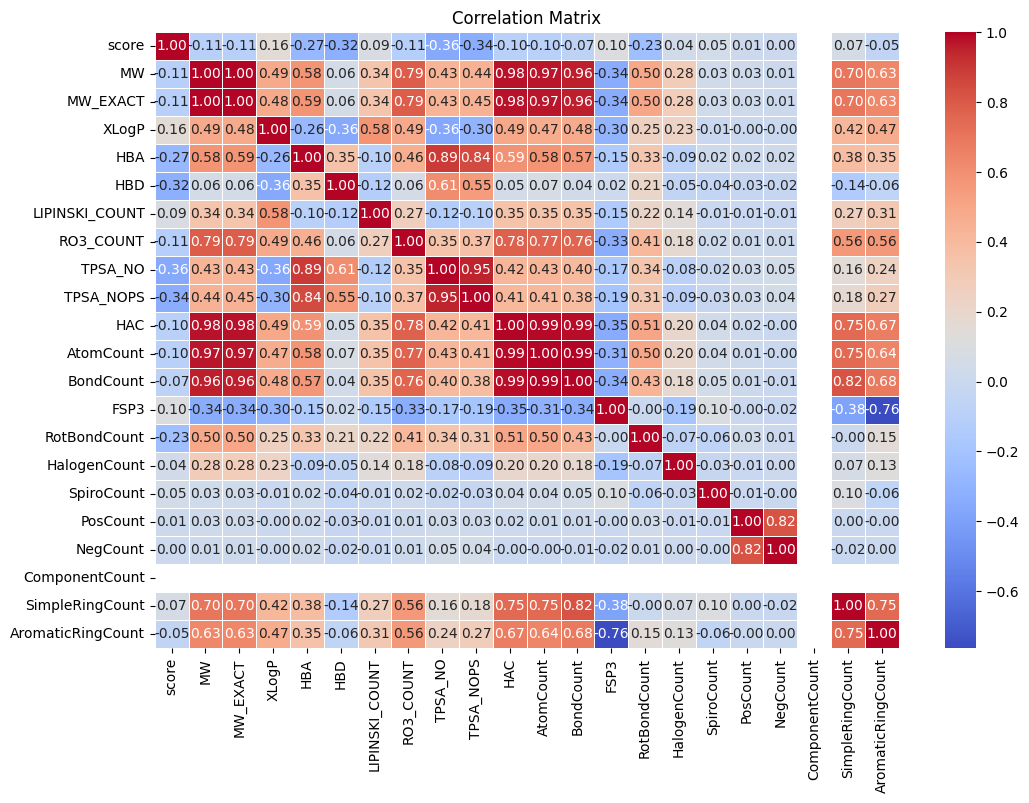

In [ ]:
# correlation matrix
plt.figure(figsize=(12,8))
num_data = drug_data.select_dtypes(include=['number'])
sns.heatmap(num_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Quick interpretation:

📌 Docking score distribution
* ➡️ A high concentration of values followed by a sharp drop may indicate a high density of compounds with similar scores, followed by a few outliers.

📌 Strong correlations
* ➡️ MW, HAC, AtomCount and BondCount are  linked (which makes sense, as the larger a compound, the more atoms and bonds it has).
* ➡️ PosCount and NegCount show a dependency between molecule charges.
* ➡️ TPSA_NO and HBA are correlated, which is expected as the total polar surface area is influenced by the number of hydrogen bond acceptors.

In [4]:
# PCA analisys and K-Means
# Objectives Reduce the dimentionality of data
# Visualize chimical space and detect clusters

# Select chimical variable ( exclude ID, SMILES, target, score)
X = drug_data.drop(columns=["ID", "SMILES", "target", "score"])


In [5]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [8]:
# add results to dataframe
drug_data["PCA1"] = X_pca[:,0]
drug_data["PCA2"] = X_pca[:,1]
drug_data["Cluster"] = clusters

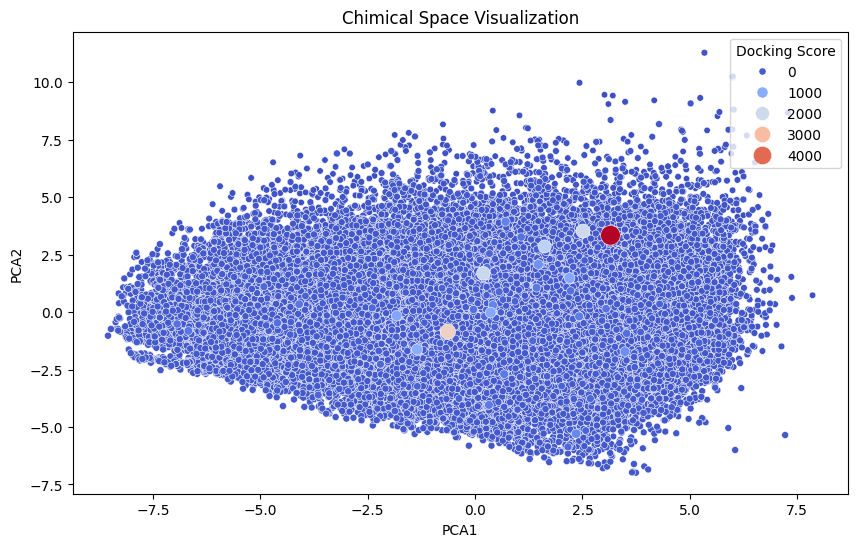

In [9]:
# Visualize clusters with Docking Score and color
plt.figure(figsize=(10,6))
sns.scatterplot(x=drug_data["PCA1"], y=drug_data["PCA2"], hue=drug_data["score"], palette="coolwarm", size=drug_data["score"], sizes=(20, 200))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Chimical Space Visualization")
plt.legend(title="Docking Score", loc="upper right")
plt.show()

# Interpretation
* In majority of points PCA1 ~ 0 and PCA2 ~ 0 that mean the distribution is homogenous
* A few molecules are scattered at the ends, but there is no clear separation between distinct groups.

2️⃣ Docking scores

* The highest scores (dark red) appear isolated in the region of PCA1 ≈ 2.5, PCA2 ≈ 2.5.
* A few other points with higher scores (orange, beige) are scattered but remain close to the center.
* The majority of molecules have a score close to zero, which corresponds to the initial distribution observed.

#  Next steps :
- Determine the number of optimal cluster
- Apply K-means
- Visualize clusters
- Analyse the docking repartition scores in clusters

In [10]:
# Optimal number of clusters
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

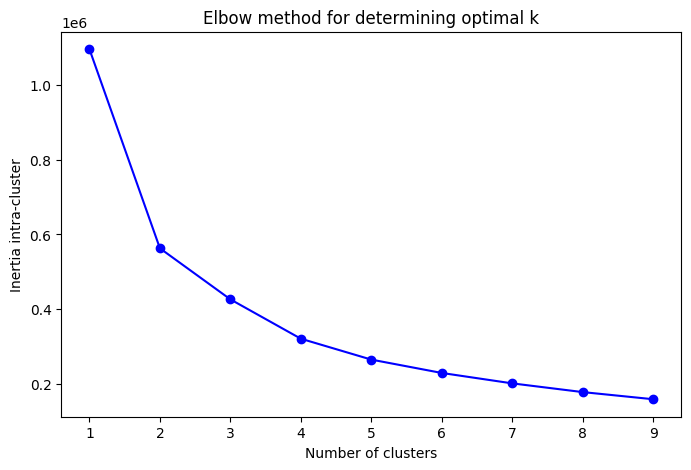

In [11]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia intra-cluster')
plt.title('Elbow method for determining optimal k')
plt.show()

In [12]:
# Apply K-Means with the k optimal
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=4, n_init=10)
clusters = kmeans.fit_predict(X_pca)

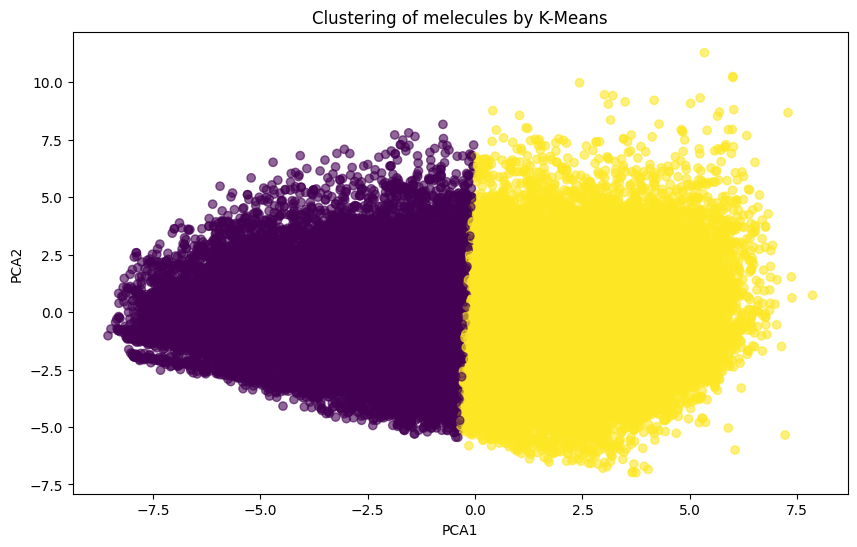

In [13]:
# Visualize clusters
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Clustering of melecules by K-Means")
plt.show()

* We can see that the data have been divided into two distinct clusters:

 * A purple cluster located mainly on the left-hand side of the graph (negative PCA1 values)
 * A yellow cluster located mainly on the right-hand side of the graph (positive PCA1 values).

# Next steps
1️⃣ Calculate the mean and median Docking Scores for each cluster.

2️⃣ Create a boxplot of Docking Scores per cluster to see their distribution.

3️⃣ Analyze whether a particular cluster contains a majority of the best molecules (high Docking Score).

In [14]:
# Add the cluster dataframe
drug_data["Cluster"] = clusters

# statistic calcul of cluster
cluster_stats = drug_data.groupby("Cluster")["score"].agg(["mean", "median", "count"])
print(cluster_stats)

              mean     median  count
Cluster                             
0       -68.102674 -66.800205  43150
1       -73.866788 -73.918390  51507


<ipython-input-15-2124a8c35550>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="score", data=drug_data, palette="viridis")


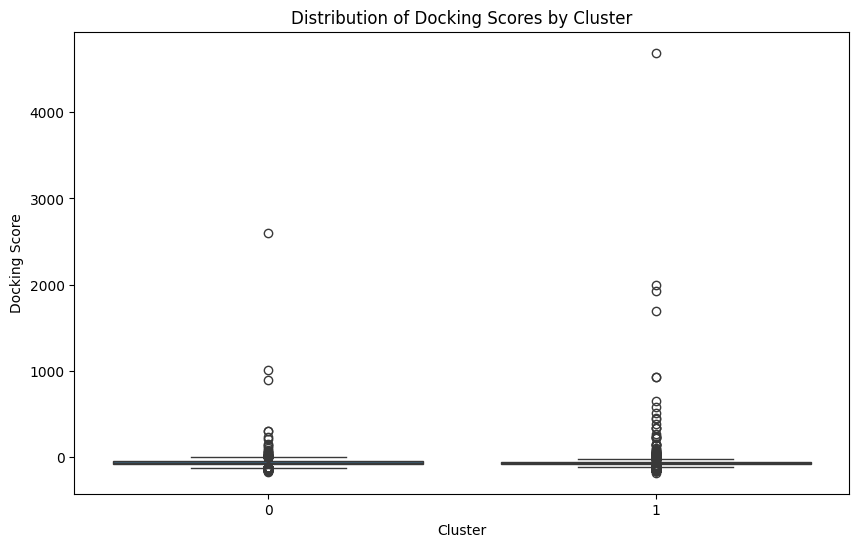

In [15]:
# Boxplot of docking scores by cluster
plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="score", data=drug_data, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Docking Score")
plt.title("Distribution of Docking Scores by Cluster")
plt.show()

1️⃣ Calculate the mean and median of the main chemical properties by cluster.

2️⃣ Create boxplots for these properties to see differences between clusters.

3️⃣ Find out if a chemical property is significantly higher in one cluster than the other.

In [16]:
# calcul the statistic of chimical properties by cluster
properties = ["MW", "HBA", "HBD", "XLogP", "TPSA_NO", "AtomCount", "BondCount"]
cluster_properties = drug_data.groupby("Cluster")[properties].agg(["mean", "median"])
print(cluster_properties)

                 MW               HBA              HBD            XLogP  \
               mean  median      mean median      mean median      mean   
Cluster                                                                   
0        273.388134  282.34  4.225446    4.0  1.380463    1.0  2.074433   
1        408.903960  405.84  6.244918    6.0  1.498088    1.0  3.645315   

                  TPSA_NO         AtomCount         BondCount         
        median       mean median       mean median       mean median  
Cluster                                                               
0         2.16  56.581351   55.7  19.597265   20.0  20.680973   21.0  
1         3.65  78.513808   77.5  29.735861   29.0  32.394471   32.0  


<ipython-input-17-ae4ed51e7cf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=prop, data=drug_data, palette="viridis")
<ipython-input-17-ae4ed51e7cf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=prop, data=drug_data, palette="viridis")
<ipython-input-17-ae4ed51e7cf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=prop, data=drug_data, palette="viridis")
<ipython-input-17-ae4ed51e7cf5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

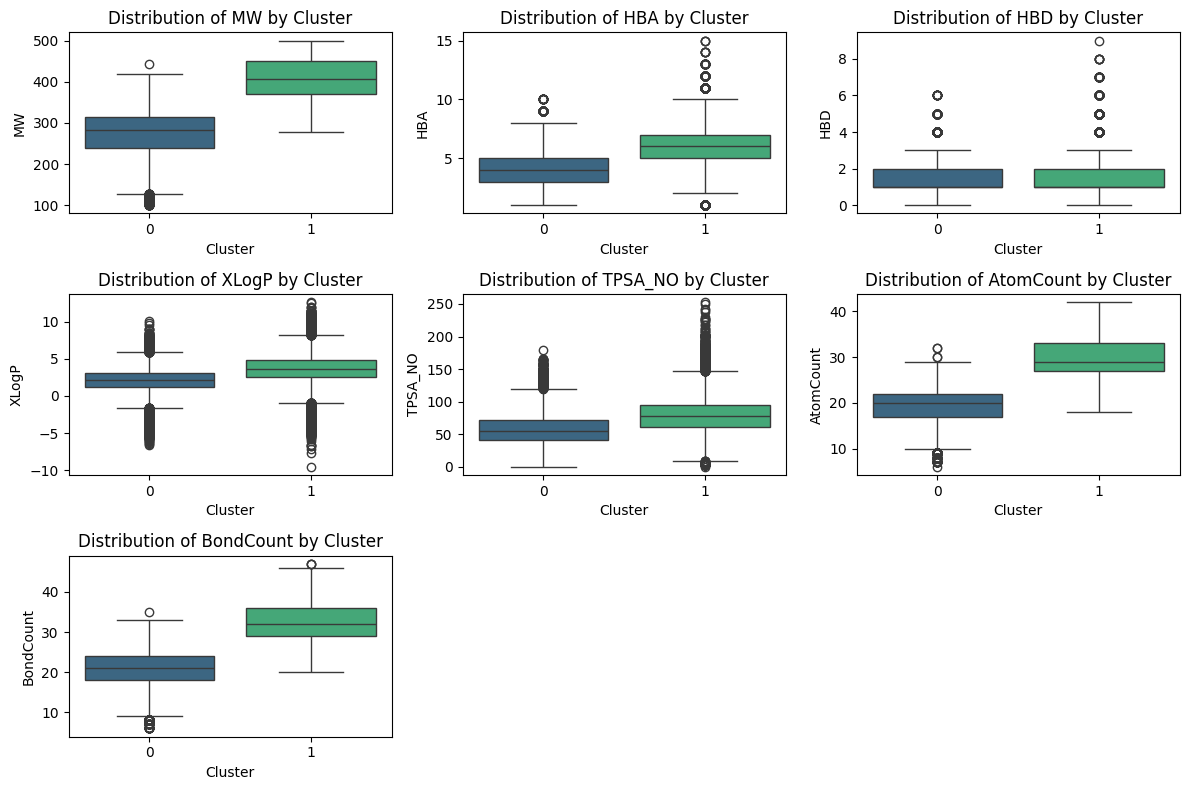

In [17]:
# Visualisation with boxplots
plt.figure(figsize=(12,8))
for i, prop in enumerate(properties, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Cluster", y=prop, data=drug_data, palette="viridis")
    plt.title(f"Distribution of {prop} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(prop)

plt.tight_layout()
plt.show()

# Interpretation

* Cluster 1 groups larger, more complex molecules, with more polar characteristics (higher TPSA, more hydrogen bond acceptors) but also a slightly more pronounced hydrophobic character.
* These molecules probably have more elaborate structures, enabling different types of interaction with biological targets.

# Influence of these properties on Docking Score
1. Correlation between Docking Score and chemical properties.
2. Simple linear regression to test the impact of a single property on the score
3. Multiple regression model

In [18]:
# correlation matrix with Docking Score
correlation_matrix = drug_data[["score", "MW", "XLogP", "HBA", "HBD", "TPSA_NO", "AtomCount", "BondCount"]].corr()
print(correlation_matrix["score"])

score        1.000000
MW          -0.106584
XLogP        0.156864
HBA         -0.272792
HBD         -0.322588
TPSA_NO     -0.357032
AtomCount   -0.096608
BondCount   -0.072451
Name: score, dtype: float64


In [20]:
# Regression : Impact of MW on the Docking Score
X = drug_data["MW"] # you can choose another parameter
X = sm.add_constant(X) # Add a constant to the model
y = drug_data["score"]

model = sm.OLS(y, X).fit()
print(model.summary()) # print a summary of the model

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1088.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          3.56e-237
Time:                        19:30:45   Log-Likelihood:            -4.6883e+05
No. Observations:               94657   AIC:                         9.377e+05
Df Residuals:                   94655   BIC:                         9.377e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.1630      0.471   -119.368      0.0

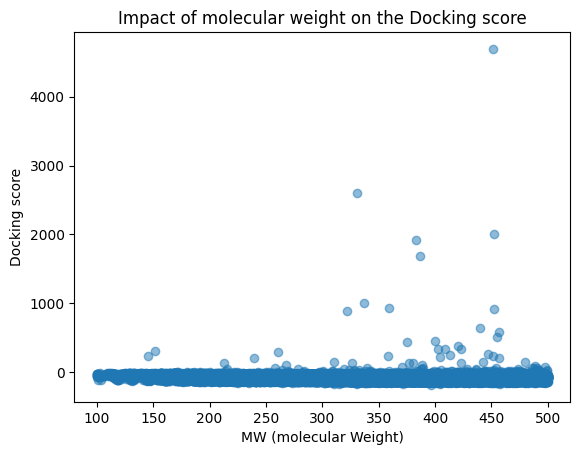

In [21]:
# Visualize the scatter plot
sns.regplot(x=drug_data["MW"], y=drug_data["score"], scatter_kws={"alpha":0.5})
plt.title("Impact of molecular weight on the Docking score")
plt.xlabel("MW (molecular Weight)")
plt.ylabel("Docking score")
plt.show()

# Docking Score regression

In [26]:
# 1 select feature and variable
features = ["MW", "AtomCount", "BondCount", "XLogP", "TPSA_NO", "HBA", "HBD"]  #  that can be adjust
target = "score"

X = drug_data[features]
y = drug_data[target]

In [27]:
# 2 Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# 3 divide data train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
# 4 train the model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R²": r2, "RMSE": rmse, "MAE": mae}
    print(f"\n {name} Performance:")
    print(f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")



 Linear Regression Performance:
R²: 0.075, RMSE: 45.202, MAE: 16.966

 Random Forest Performance:
R²: 0.116, RMSE: 44.187, MAE: 14.734

 XGBoost Performance:
R²: 0.119, RMSE: 44.105, MAE: 15.001


<ipython-input-33-b39dce337dc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x="index", y="R²", palette="viridis")


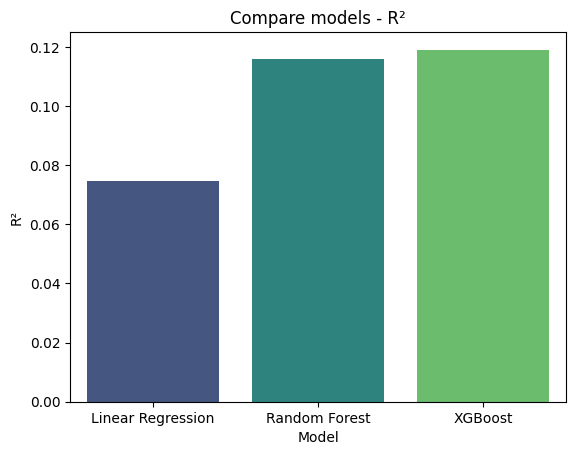

In [33]:
# 5 compare performances
results_df = pd.DataFrame(results).T
sns.barplot(data=results_df.reset_index(), x="index", y="R²", palette="viridis")
plt.title("Compare models - R²")
plt.xlabel("Model")
plt.ylabel("R²")
plt.show()
